<a href="https://www.kaggle.com/code/khaiid/98-recall-predicting-breast-cancer?scriptVersionId=92210219" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports needed

In [192]:
# All the imports needed

# Data Manipulation
import numpy as np
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Train Test Split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler

#Models

#Shallow:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Deep Neural Networks:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall, Accuracy
import tensorflow.keras.optimizers

#Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#File Directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# Reading and cleaning the data

In [193]:
cancer = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [194]:
#Check the head of the data
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Feature Engineering & Data cleaning

### Checking null values

<AxesSubplot:>

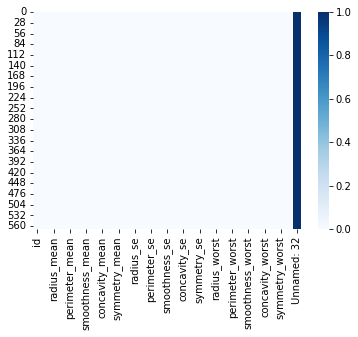

In [195]:
#Heatmap for all null values
sns.heatmap(cancer.isnull(),cmap='Blues')

In [196]:
#Drop unnamed & id columns
cancer.drop(['Unnamed: 32','id'],axis=1,inplace=True)

### Checking & handling outliers

<AxesSubplot:>

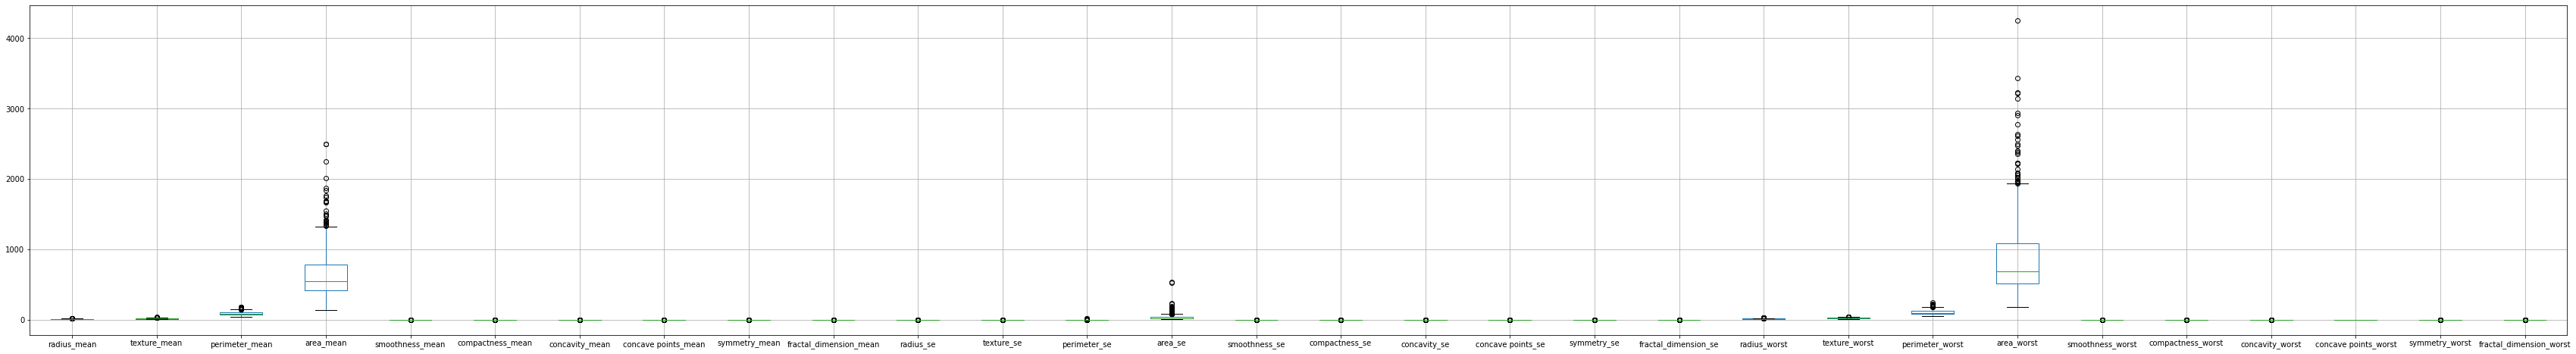

In [197]:
plt.figure(figsize=(60,8))
cancer.boxplot()

#### Radius_mean

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='radius_mean'>

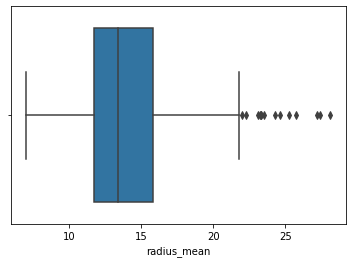

In [198]:
sns.boxplot(cancer['radius_mean'])

#### Texture mean

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='texture_mean'>

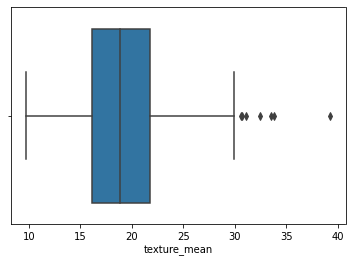

In [199]:
sns.boxplot(cancer['texture_mean'])

#### Area_worst

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='area_worst'>

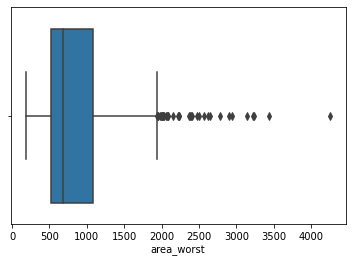

In [200]:
sns.boxplot(cancer['area_worst'])

#### Area se

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='area_se'>

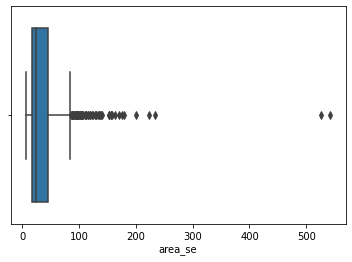

In [201]:
sns.boxplot(cancer['area_se'])

### Handling outliers

In [202]:
cancer = cancer[(cancer['radius_mean'] < 23) & (cancer['texture_mean'] < 35) & (cancer['area_worst'] < 2300) & (cancer['area_se'] < 150)]

# EDA

<AxesSubplot:>

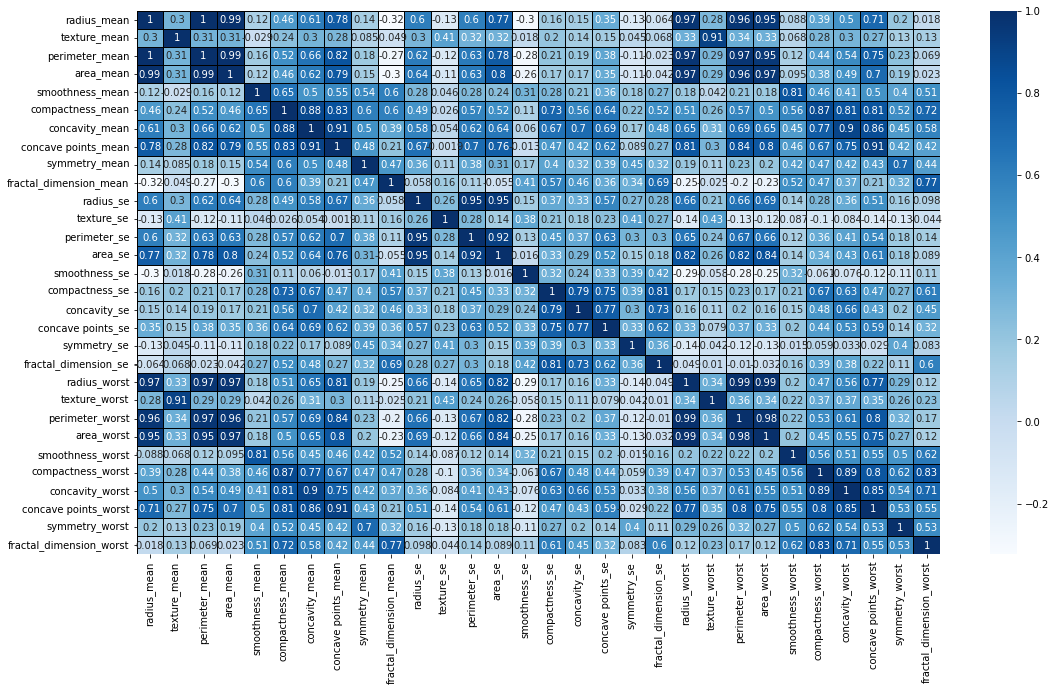

In [203]:
#Heatmap for all correlations
plt.figure(figsize = (18, 10))
sns.heatmap(cancer.corr(),cmap='Blues',linewidths=1,linecolor='black',annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

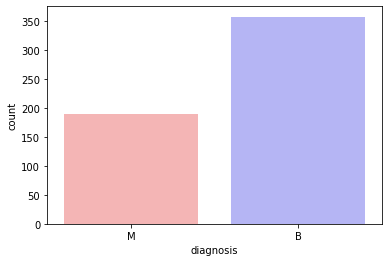

In [204]:
# Countplot of Diagnosis (M = malignant, B = benign)
sns.countplot(cancer['diagnosis'],palette='bwr_r')

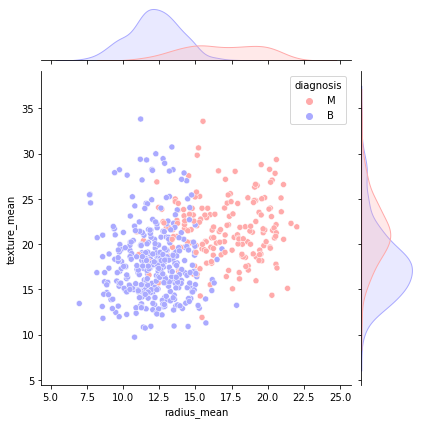

In [205]:
#Jointplot comparing radius and texture based on diagnosis
sns.jointplot(data=cancer,x='radius_mean',y='texture_mean',hue='diagnosis',palette='bwr_r',kind='scatter')

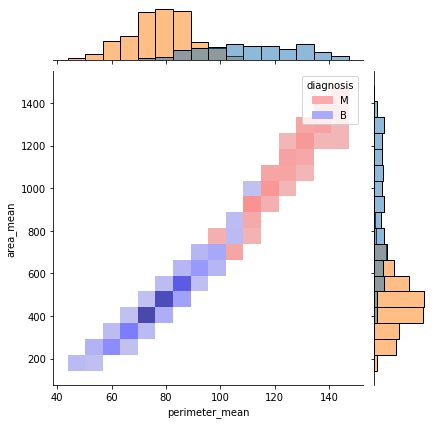

In [206]:
#Jointplot comparing perimeter and area based on diagnosis
sns.jointplot(data=cancer,x='perimeter_mean',y='area_mean',hue='diagnosis',palette='bwr_r',kind='hist')

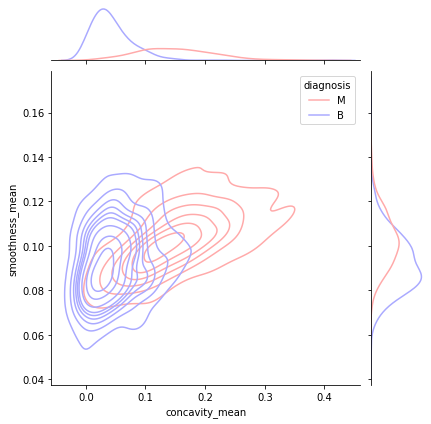

In [207]:
#Jointplot comparing concativity and smoothness based on diagnosis
sns.jointplot(data=cancer,x='concavity_mean',y='smoothness_mean',hue='diagnosis',palette='bwr_r',kind='kde')

# Train Test Split

In [208]:
# Label encoding
cancer.diagnosis = [1 if each == "M" else 0 for each in cancer.diagnosis]

In [209]:
# 1 = malignant, 0 = benign)
cancer['diagnosis'].value_counts()

0    357
1    189
Name: diagnosis, dtype: int64

In [210]:
#Choosing features and label based on feature importance
Features = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst']]

Label = cancer['diagnosis']

In [211]:
# Scaling the data using standard scaler
scaler = StandardScaler()
scaler.fit(Features)
scaled = scaler.transform(Features)

In [212]:
X = scaled
y = Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN

## Choosing best n_neighbors value

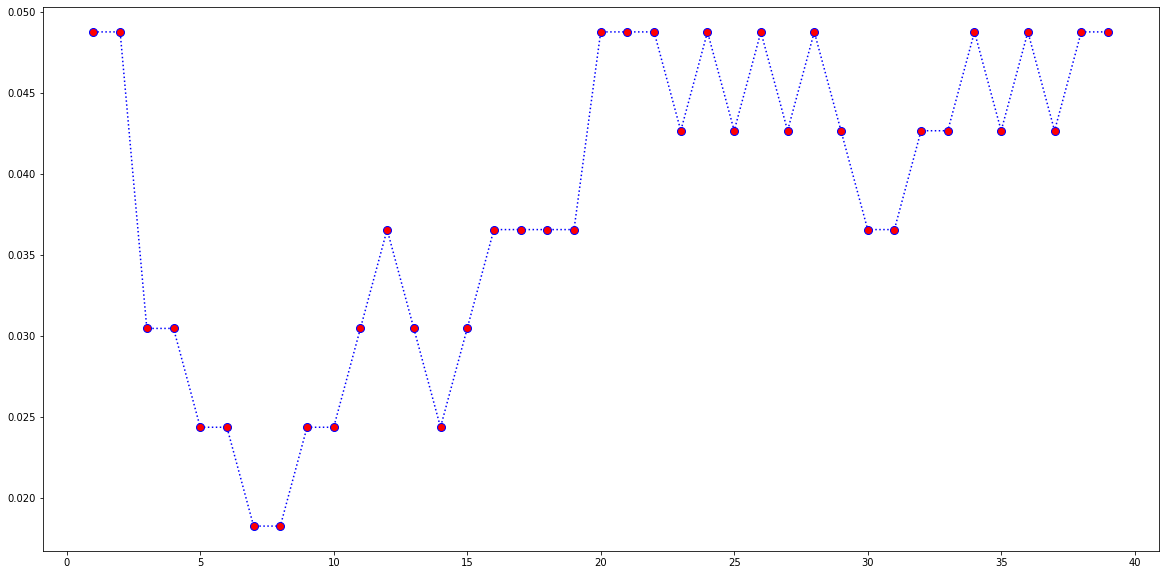

In [213]:
err_rate = [] # Array to save all error rates

for i in range(1,40): # loop to try all error rates from 1 to 40
    knn = KNeighborsClassifier(n_neighbors=i) # create a knn object with number of neighbours with value i
    knn.fit(X_train,y_train) # fit the model
    pred_i = knn.predict(X_test) # predict the value
    err_rate.append(np.mean(pred_i != y_test)) #add the value to the array
    
    # Plotting the value of k error rate using the method we created above to make it easier to choose a k value
plt.figure(figsize=(20,10)) # size of the figure
plt.plot(range(1,40),err_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)#plotting the values
plt.title = 'K Values VS Error Rates' #title
plt.xlabel = 'K Value' #x label
plt.ylabel= 'Error Rate' # y label
plt.show()

# Training the model

In [232]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)

In [233]:
print('KNN Classifier' + '\n')
print(classification_report(y_test,knnpred))

KNN Classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       103
           1       0.98      0.97      0.98        61

    accuracy                           0.98       164
   macro avg       0.98      0.98      0.98       164
weighted avg       0.98      0.98      0.98       164



<AxesSubplot:>

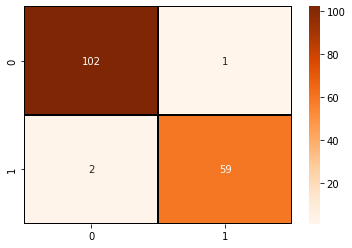

In [234]:
#confusion matrix as a heatmap
sns.heatmap(confusion_matrix(y_test,knnpred), annot=True,cmap='Oranges',fmt='g',linewidth=2,linecolor='black')

# Support Vector Classifier SVC

In [217]:
sup = SVC(C=1,gamma='scale',kernel='linear')
sup.fit(X_train,y_train)
svcpred = sup.predict(X_test)

In [218]:
print('Support Vector Classifier' + '\n')
print(classification_report(y_test,svcpred))
print('\n' + 'confusion matrix')
print(confusion_matrix(y_test,svcpred))

Support Vector Classifier

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       103
           1       1.00      0.97      0.98        61

    accuracy                           0.99       164
   macro avg       0.99      0.98      0.99       164
weighted avg       0.99      0.99      0.99       164


confusion matrix
[[103   0]
 [  2  59]]


<AxesSubplot:>

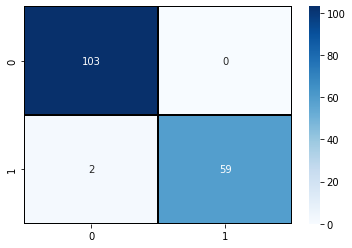

In [219]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,svcpred), annot=True,cmap='Blues',fmt='g',linewidth=2,linecolor='black')

# Logistic Regression

In [220]:
logr = LogisticRegression(solver='liblinear',C=1,max_iter=30,multi_class='auto')
logr.fit(X_train,y_train)
logpred = logr.predict(X_test)

In [221]:
print('Logistic Regression' + '\n')
print(classification_report(y_test,logpred))

Logistic Regression

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       103
           1       0.97      0.98      0.98        61

    accuracy                           0.98       164
   macro avg       0.98      0.98      0.98       164
weighted avg       0.98      0.98      0.98       164



<AxesSubplot:>

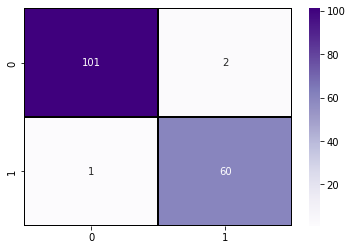

In [222]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,logpred), annot=True,cmap='Purples',fmt='g',linewidth=2,linecolor='black')

# Random Forest Classifier

## Finding best n_estimators value

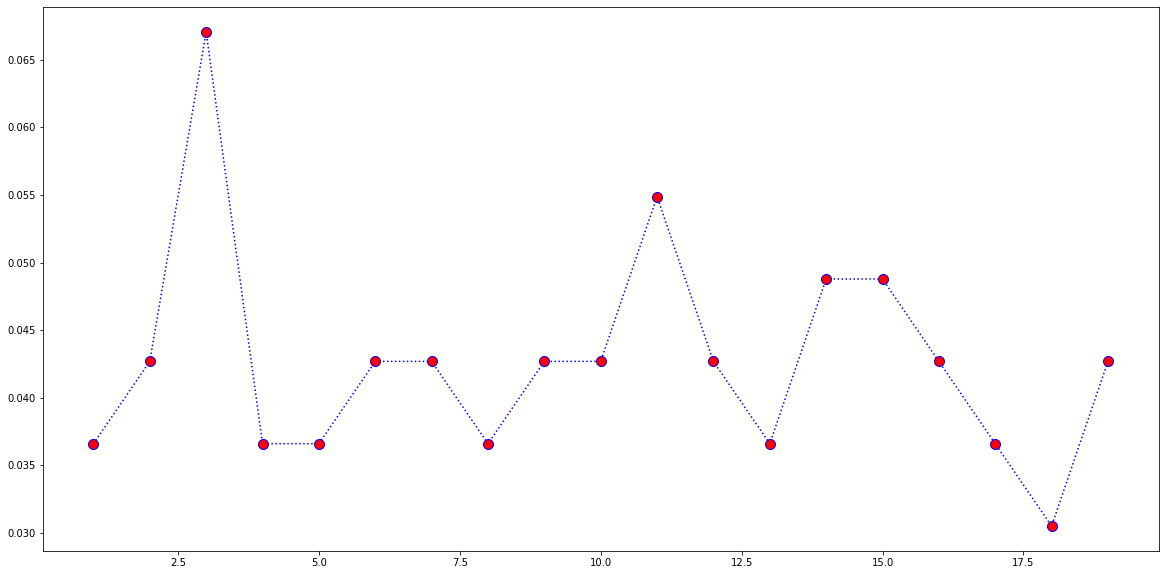

In [223]:
err = [] # Array to save all error rates

for i in range(1,20): # Loop to try all error rates from 1 to 20
    rfe = RandomForestClassifier(n_estimators=i*10) # Create rfc with number of estimators with value i*10
    rfe.fit(X_train,y_train) # Fit the model
    errpred = rfe.predict(X_test) # Predict the value
    err.append(np.mean(errpred != y_test)) #Add the value to the array
    
    
# Plotting the value of estimators error rate using the method we created above to make it easier to choose an estimator value
plt.figure(figsize=(20,10)) # Size of the figure
plt.plot(range(1,20),err,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=10)#plotting the values
plt.title = 'Number of estimators VS Error Rates' #title
plt.xlabel = 'Estimators' #X label
plt.ylabel= 'Error Rate' # Y label
plt.show()

In [235]:
rfc = RandomForestClassifier(n_estimators=180,max_features='auto', max_depth=8, n_jobs=-1)
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)

In [238]:
print('Random Forest' + '\n')
print(classification_report(y_test,rfcpred))

Random Forest

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       103
           1       0.95      0.95      0.95        61

    accuracy                           0.96       164
   macro avg       0.96      0.96      0.96       164
weighted avg       0.96      0.96      0.96       164



<AxesSubplot:>

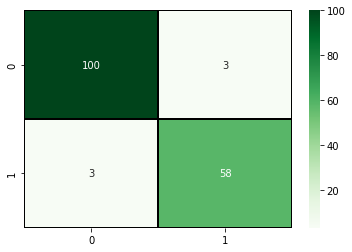

In [237]:
#Confusion matrix
sns.heatmap(confusion_matrix(y_test,rfcpred), annot=True,cmap='Greens',fmt='g',linewidth=2,linecolor='black')

# Deep Neural Networks

In [227]:
# Stop training when a monitored quantity has stopped improving
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [228]:
model = Sequential()

model.add(Dense(568,activation='relu')) #Input layer (Number of features - 1(label))
model.add(Dense(284,activation='selu'))
model.add(Dense(142,activation='relu'))
model.add(Dense(71,activation='selu'))
model.add(Dense(36,activation='relu'))
model.add(Dense(2,activation='selu'))

model.add(Dense(1,activation='sigmoid')) #Output layer (Since it's a binary classification problem)

#Using accuracy as loss function
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [229]:
model.fit(x=X_train, 
          y=y_train.values, 
          epochs=100,
          validation_data=(X_test, y_test.values),
          verbose=1,
          batch_size=128,
          callbacks=[early_stop]
          )

Epoch 1/100
3/3 [==============================] - 1s 114ms/step - loss: 0.5738 - accuracy: 0.7356 - val_loss: 0.4014 - val_accuracy: 0.9390
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.3694 - accuracy: 0.9267 - val_loss: 0.3172 - val_accuracy: 0.9512
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.3011 - accuracy: 0.9424 - val_loss: 0.2726 - val_accuracy: 0.9573
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.2639 - accuracy: 0.9424 - val_loss: 0.2440 - val_accuracy: 0.9451
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2384 - accuracy: 0.9503 - val_loss: 0.2236 - val_accuracy: 0.9390
Epoch 6/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2198 - accuracy: 0.9555 - val_loss: 0.2078 - val_accuracy: 0.9451
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 0.2054 - accuracy: 0.9555 - val_loss: 0.1952 - val_accuracy: 0.9512
Epoch 8/100
3/3 [==

<AxesSubplot:>

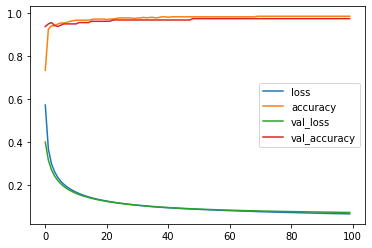

In [230]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Feature importance

<AxesSubplot:>

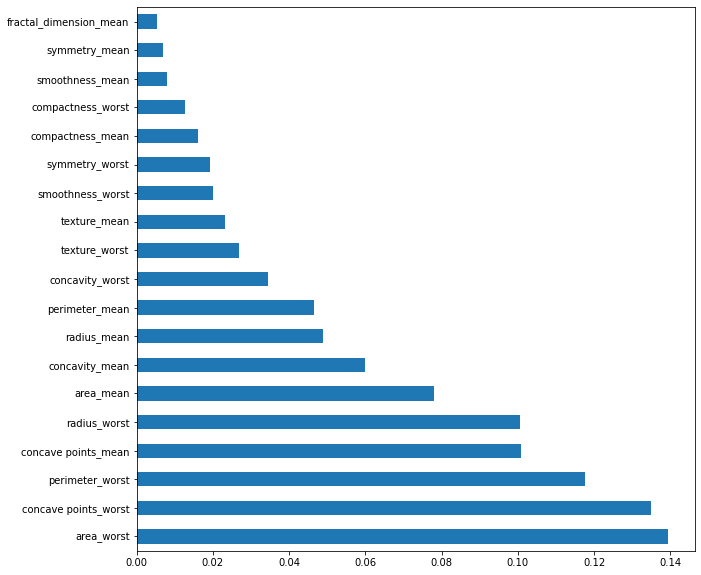

In [231]:
# Show which features has the most effect on our results so we can modify and tune our features
# I used Random Forest Classifier to determine the feature importances

plt.figure(figsize=(10,10))
importance = pd.Series(rfc.feature_importances_,index=Features.columns)
importance.nlargest(20).plot(kind='barh')

## Thank you, feel free to ask any question or add any comment !